<a href="https://colab.research.google.com/github/vtanoe08/Python_Vincent/blob/main/SP_TEST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

STOCKS MARKETS ANALYSIS

In [ ]:
!pip install investpy                                                                                  #https://swingtradebot.com/equities?min_vol=250000&min_price=3&max_price=20&adx_trend=&grade=&include_etfs=0&html_button=as_html#
from pandas_datareader import  data,wb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

     |████████████████████████████████| 4.4MB 9.1MB/s 
     |████████████████████████████████| 245kB 41.3MB/s 
     |████████████████████████████████| 5.5MB 48.8MB/s 
     |████████████████████████████████| 512kB 35.1MB/s 
  Created wheel for investpy: filename=investpy-1.0.3-cp37-none-any.whl size=4466737 sha256=829c97a2b664d6fe7ccbb475df96af1a3dfdf6dbf7e502e45731e209ecdafaba
  Stored in directory: /root/.cache/pip/wheels/ef/ef/31/cd22f970a59025c6d6dee56091b1f538d850e932697db1950e
Successfully built investpy
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
  Found existing installation: pytz 2018.9
    Uninstalling pytz-2018.9:
      Successfully uninstalled pytz-2018.9


GETTING THE DATA FROM YAHOO FINANCE

AxesSubplot(0.125,0.2;0.775x0.68)


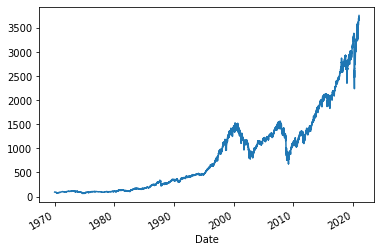

In [ ]:
#https://swingtradebot.com/equities?min_vol=250000&min_price=1.0&max_price=20.0&adx_trend=&grade=A&include_etfs=0&html_button=as_html
data=data.DataReader('^GSPC',data_source='yahoo',start='1/1/1970',end='1/1/2021')
data1=data.DataReader('^GSPC',data_source='yahoo',start='10/1/1918',end='10/1/1930')
data2=data.copy()
print(data2['Close'].plot());

#msft['Close'].tail(5).round(2)

DESCRIPTIVE ANALYSIS

In [ ]:
data2.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1970-11-02,83.989998,82.660004,0.0,83.510002,9470000,83.510002
1970-11-03,84.769997,83.209999,0.0,84.220001,11760000,84.220001
1970-11-04,85.260002,83.820000,0.0,84.389999,12180000,84.389999
1970-11-05,84.790001,83.529999,0.0,84.099998,10800000,84.099998
1970-11-06,84.730003,83.550003,0.0,84.220001,9970000,84.220001


RESAMPLING DAILY DATA TO MONTHLY DATA

AxesSubplot(0.125,0.125;0.775x0.755)


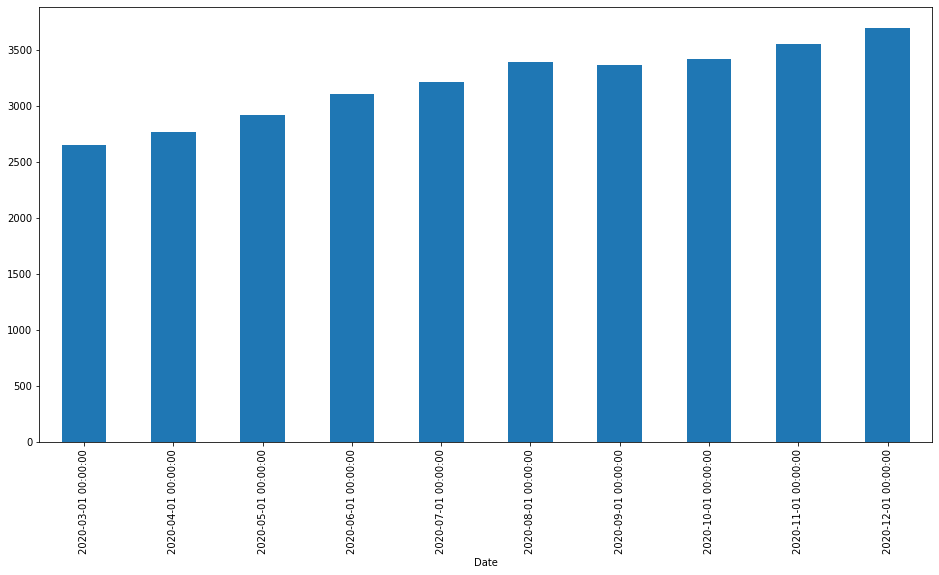

In [ ]:
sp501=sp500.reset_index()
x=sp500.resample('MS').mean()
plt.figure(figsize=(16,8))
print(x['Adj Close'].tail(10).plot(kind='bar'))

RESAMPLING TO YEARLY DATA

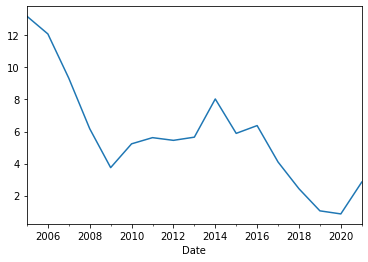

In [ ]:
#Daily to Monthly
x=sp500.resample('YS').mean()
x['Close'].plot() 


CALCULATE MAX AND MIX

In [ ]:
print('max: ', msft['Close'].max())

print('min: ', msft['Close'].min())

max:  3735.360107421875
min:  62.279998779296875


CREATE RELATIVE STRENGH INDEX (RSI)

In [ ]:
# Creating RSI indicators within a year for apple 
# Import Built-Ins
prices=msft['Close']
import logging

# Import Third-Party
import pandas as pd
import numpy as np

# Import Homebrew

# Init Logging Facilities
log = logging.getLogger(__name__)

def rsi(prices, n=14):
        deltas = np.diff(prices)
        seed = deltas[:n+1]
        up = seed[seed>=0].sum()/n
        down = -seed[seed<0].sum()/n
        rs = up/down
        rsi = np.zeros_like(prices)
        rsi[:n] = 100. - 100./(1.+rs)

        for i in range(n, len(prices)):
                delta = deltas[i-1] # cause the diff is 1 shorter

                if delta>0:
                        upval = delta
                        downval = 0.
                else:
                        upval = 0.
                        downval = -delta
                up = (up*(n-1) + upval)/n
                down = (down*(n-1) + downval)/n

                rs = up/down
                rsi[i] = 100. - 100./(1.+rs)
        return rsi

ANOTHER WAY TO SCRIPT DATA FROM YAHOO FINANCE

In [ ]:

!pip install yfinance 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# ___library_import_statements___
import pandas as pd

# for pandas_datareader, otherwise it might have issues, sometimes there is some version mismatch
pd.core.common.is_list_like = pd.api.types.is_list_like

# make pandas to print dataframes nicely
pd.set_option('expand_frame_repr', False)  

import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time

#newest yahoo API 
import yfinance as yahoo_finance

#optional 
#yahoo_finance.pdr_override()

%matplotlib inline

  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=4d57efe9b7299d59217682aff44f68f3bcfe8f849427015aae63f9c590b39c87
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance


CALLING THE STOCK INDEX

In [ ]:
# ___variables___
ticker = 'OEG'

start_time = datetime.datetime(2017, 10, 1)
#end_time = datetime.datetime(2019, 1, 20)
end_time = datetime.datetime.now().date().isoformat() 

In [ ]:
# yahoo gives only daily historical data
connected = False
while not connected:
    try:
        ticker_df = web.get_data_yahoo(ticker, start=start_time, end=end_time)
        connected = True
        print('connected to yahoo')
    except Exception as e:
        print("type error: " + str(e))
        time.sleep( 5 )
        pass   

# use numerical integer index instead of date    
ticker_df = ticker_df.reset_index()
print(ticker_df.head(5))

connected to yahoo
        Date   High   Low  Open  Close  Volume  Adj Close
0 2017-10-02  3.660  3.49  3.66   3.49   65600       3.49
1 2017-10-03  3.546  3.45  3.46   3.48   24400       3.48
2 2017-10-04  3.600  3.48  3.50   3.48   24700       3.48
3 2017-10-05  3.600  3.50  3.50   3.53   34300       3.53
4 2017-10-06  3.780  3.56  3.57   3.78   60300       3.78


ANOTHER METHOD OF RSI CALCULATION

In [ ]:
df = ticker_df
def computeRSI (data, time_window):
    diff = data.diff(1).dropna()        # diff in one field(one day)

    #this preservers dimensions off diff values
    up_chg = 0 * diff
    down_chg = 0 * diff
    
    # up change is equal to the positive difference, otherwise equal to zero
    up_chg[diff > 0] = diff[ diff>0 ]
    
    # down change is equal to negative deifference, otherwise equal to zero
    down_chg[diff < 0] = diff[ diff < 0 ]
    
    # check pandas documentation for ewm
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html
    # values are related to exponential decay
    # we set com=time_window-1 so we get decay alpha=1/time_window
    up_chg_avg   = up_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    down_chg_avg = down_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    
    rs = abs(up_chg_avg/down_chg_avg)
    rsi = 100 - 100/(1+rs)
    return rsi

ADD RSI COLUMN TO THE DATA

In [ ]:
df['RSI'] = computeRSI(df['Adj Close'], 14)
print(df.head())
print(df.tail())

        Date   High   Low  Open  Close  Volume  Adj Close  RSI
0 2017-10-02  3.660  3.49  3.66   3.49   65600       3.49  NaN
1 2017-10-03  3.546  3.45  3.46   3.48   24400       3.48  NaN
2 2017-10-04  3.600  3.48  3.50   3.48   24700       3.48  NaN
3 2017-10-05  3.600  3.50  3.50   3.53   34300       3.53  NaN
4 2017-10-06  3.780  3.56  3.57   3.78   60300       3.78  NaN
          Date   High   Low    Open  Close    Volume  Adj Close        RSI
820 2021-01-05  2.146  1.82  1.9500   2.08   5104300       2.08  65.286437
821 2021-01-06  2.320  2.00  2.1190   2.16   6237800       2.16  66.919643
822 2021-01-07  2.900  2.28  2.3200   2.88  13825600       2.88  77.280031
823 2021-01-08  3.950  3.03  3.1100   3.40  17393100       3.40  81.730353
824 2021-01-11  4.910  3.50  3.5431   4.44  16596852       4.44  87.151146


VISUALIZE RSI and MOVING AVERAGE

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


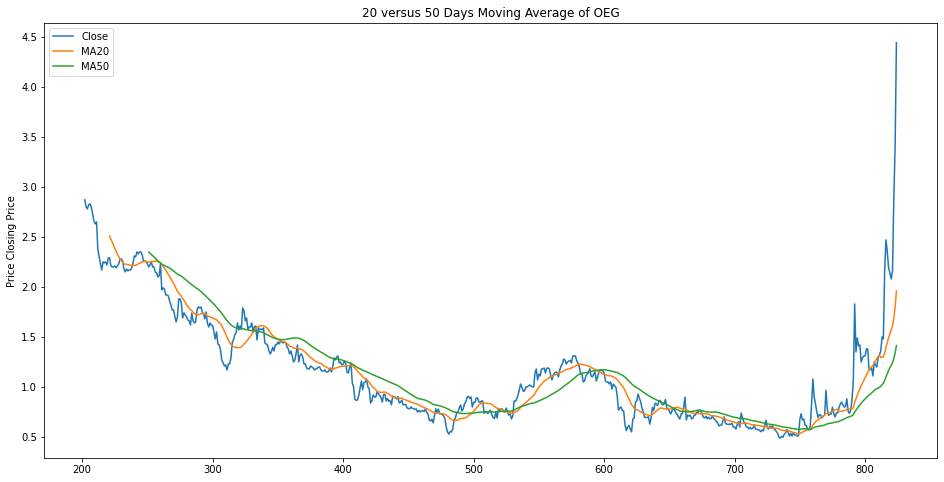

In [ ]:
#print(rsi(prices));
df1=df.loc['2019-10-30':,:]
df1['MA20']=df1['Close'].rolling(20).mean()
df1['MA50']=df1['Close'].rolling(50).mean()
df1[['Close','MA20','MA50']].plot(label='Closing_Price',figsize=(16,8),title='20 versus 50 Days Moving Average of OEG');
plt.ylabel('Price Closing Price');

GRAPH RSI

AxesSubplot(0.125,0.125;0.775x0.755)
          Date   High   Low    Open  Close    Volume  Adj Close        RSI    MA20     MA50
820 2021-01-05  2.146  1.82  1.9500   2.08   5104300       2.08  65.286437  1.5715  1.21534
821 2021-01-06  2.320  2.00  2.1190   2.16   6237800       2.16  66.919643  1.6105  1.24288
822 2021-01-07  2.900  2.28  2.3200   2.88  13825600       2.88  77.280031  1.6855  1.28614
823 2021-01-08  3.950  3.03  3.1100   3.40  17393100       3.40  81.730353  1.7965  1.33954
824 2021-01-11  4.910  3.50  3.5431   4.44  16596852       4.44  87.151146  1.9600  1.41374


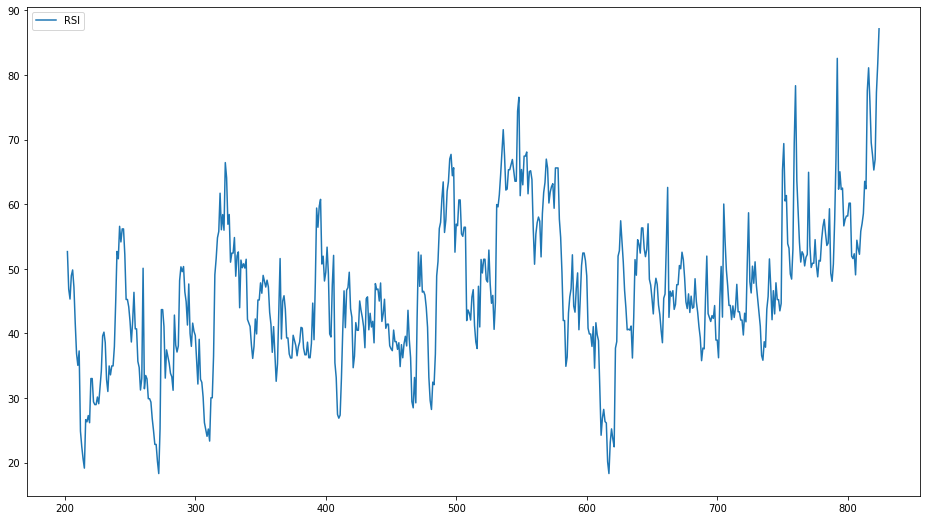

In [ ]:
#Average and RSI
print(df1.loc['2018-10-30':,'RSI'].plot(figsize=(16,9)))
plt.legend();
print(df1.tail())

IMPORT DATA FROM PANDAS DATAREADER

In [ ]:
#many stocks 
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
import pandas as pd
all_data = {ticker: web.get_data_yahoo(ticker)
     for ticker in ['AAPL', 'AMC', 'BA','AXP','BMRN','CCL','CYTK', 'DAL', 'DFS','DOCU','GOSS','HTBX',
                    'IVR','JWN','KODK','LI','MAR','NKLA','NVDA','NVAX','OSPN','PLCE','QQQ','RETA','RH',
                    'RKT','ROKU','SPCE','SVC','TNXP','TSLA','VRTX','WKHS','ZM']}
price = pd.DataFrame({ticker: data['Adj Close']
     for ticker, data in all_data.items()})
volume = pd.DataFrame({ticker: data['Volume']
     for ticker, data in all_data.items()})     

In [ ]:
print(price.tail(10).round(2))

              AAPL   AMC      BA     AXP  ...    TSLA    VRTX   WKHS      ZM
Date                                      ...                               
2020-10-21  116.87  3.00  163.86  101.43  ...  422.64  211.38  19.34  513.19
2020-10-22  115.75  3.12  169.07  104.79  ...  425.79  210.08  20.17  520.54
2020-10-23  115.04  2.97  167.36  100.98  ...  420.63  211.58  20.34  511.52
2020-10-26  115.05  2.75  160.83   96.88  ...  420.28  207.15  18.53  517.79
2020-10-27  116.60  2.79  155.24   94.93  ...  424.68  212.19  17.25  538.99
2020-10-28  111.20  2.61  148.14   91.60  ...  406.02  208.34  16.75  516.01
2020-10-29  115.32  2.52  148.29   91.07  ...  410.83  207.01  17.27  489.68
2020-10-30  108.86  2.36  144.39   91.24  ...  388.04  208.36  15.38  460.91
2020-11-02  108.77  2.15  148.60   93.40  ...  400.51  207.42  16.01  453.00
2020-11-03  110.44  2.34  153.65   96.29  ...  423.90  211.14  17.85  451.51

[10 rows x 34 columns]


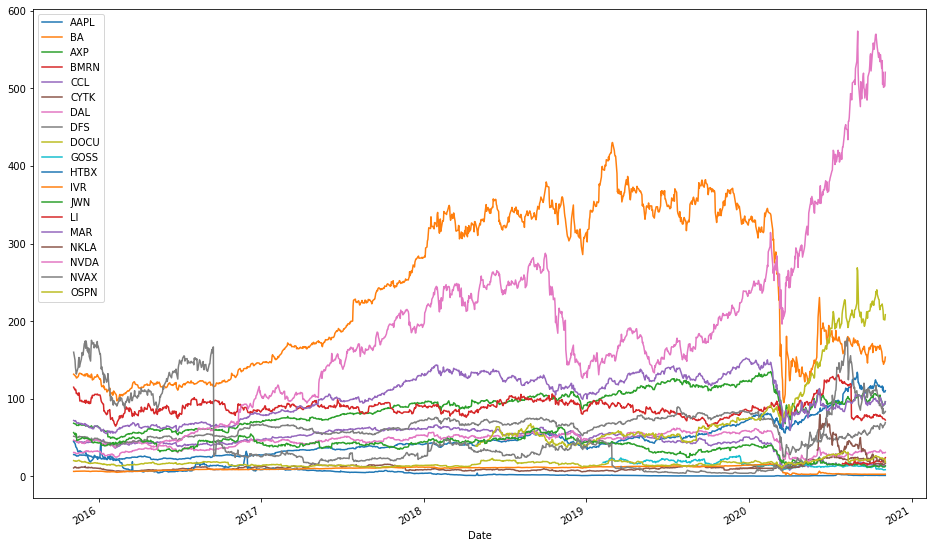

In [ ]:
price.iloc[:,[0,2,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18,19,20]].plot(figsize=(16,10));

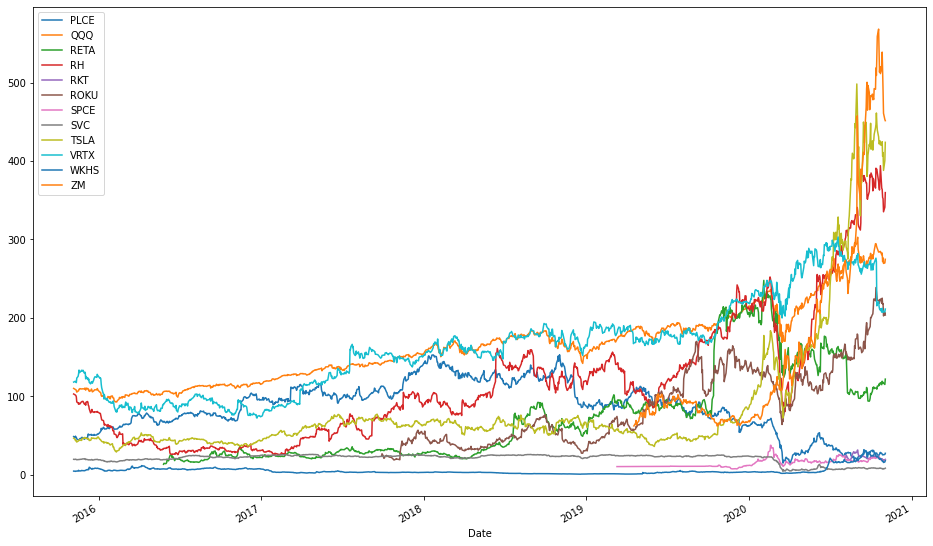

In [ ]:
price.iloc[:,[21,22,23,24,25,26,27,28,30,31,32,33]].plot(figsize=(16,10));

In [ ]:
perc=[.50]
price.tail(14).describe(perc).round(2)

,AAPL,AMC,BA,AXP,BMRN,CCL,CYTK,DAL,DFS,DOCU,GOSS,HTBX,IVR,JWN,KODK,LI,MAR,NKLA,NVDA,NVAX,OSPN,PLCE,QQQ,RETA,RH,RKT,ROKU,SPCE,SVC,TNXP,TSLA,VRTX,WKHS,ZM
count,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00
mean,114.79,2.79,158.96,98.40,76.33,13.99,16.04,31.45,65.05,219.32,9.17,1.20,2.75,12.80,8.07,20.10,95.52,20.64,530.64,92.10,23.50,26.05,280.36,115.70,365.79,20.03,217.86,19.72,7.78,0.65,420.33,211.65,19.05,512.42
std,3.66,0.37,8.88,5.33,2.12,0.80,0.47,1.21,2.29,11.18,0.49,0.05,0.03,0.69,0.84,1.60,3.18,1.62,18.36,9.60,1.89,1.18,6.77,3.06,17.33,1.18,7.91,2.08,0.36,0.06,15.44,4.17,2.42,36.90
min,108.77,2.15,144.39,91.07,72.61,12.30,15.35,29.65,60.60,201.56,8.30,1.11,2.70,12.10,6.92,18.40,89.97,18.31,501.36,80.71,18.20,24.66,269.38,108.91,335.23,18.23,202.40,17.42,7.10,0.56,388.04,207.01,15.38,451.51
50%,115.53,2.78,162.35,98.93,77.10,14.03,16.22,31.40,65.14,219.04,9.36,1.19,2.75,12.51,8.18,19.58,95.58,20.59,535.15,90.38,23.74,25.65,283.23,115.89,364.59,20.06,220.28,18.80,7.79,0.64,422.29,211.26,18.94,516.90
max,120.71,3.54,169.07,104.91,79.25,15.36,16.72,34.00,69.36,240.45,9.68,1.32,2.80,14.33,9.33,24.05,101.76,23.30,558.80,111.42,25.90,28.22,290.10,121.75,394.08,22.35,226.47,23.03,8.41,0.74,448.88,220.51,22.81,568.34


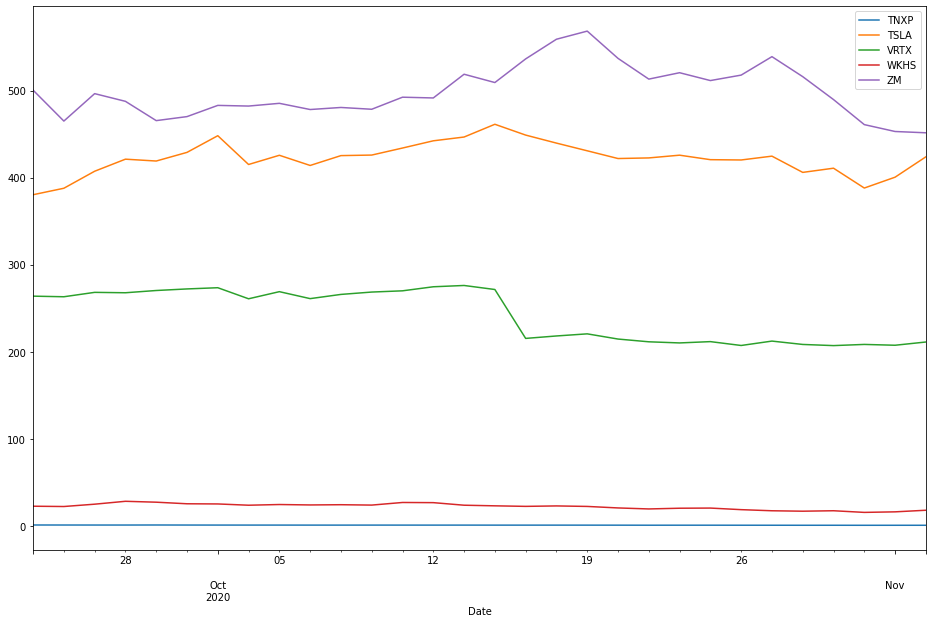

In [ ]:
price.iloc[:,[29,30,31,32,33]].tail(30).plot(figsize=(16,10));

In [ ]:
price1=price.max() - price.min()
price1=pd.DataFrame(price1)
price1.columns=['difference']
price1.sort_values('difference',ascending=False).head(5)
price1.T.round(2)

,AAPL,ADP,AIG,ARLO,AXP,BMRN,CCL,DAL,DFS,DMLRY,EBAY,EVER,FEYE,GE,GLPG,HAE,HAL,HTBX,INTC,JWN,KODK,LI,MAR,NAK,NKLA,NSANY,NVAX,NVDA,OSPN,OSUR,PCRFY,PLCE,PRMW,PRPH,QCOM,QDEL,QQQ,RETA,RLFTF,ROKU,SIRI,SPCE,SPY,SVC,TAC,TAOP,TNXP,TSLA,VWAPY,WMT,ZM
difference,107.84,110.99,42.52,21.58,88.06,68.81,58.25,43.07,64.83,14.09,37.65,58.61,30.36,23.12,236.03,112.39,48.79,56.79,42.39,50.33,31.65,8.78,97.5,3.15,69.46,14.16,209.11,513.77,22.01,18.37,8.36,138.77,8.17,2.57,82.65,288.09,202.4,234.67,0.78,154.91,4.26,30.13,183.18,21.67,6.06,16.08,7789.6,469.59,34.66,90.47,263.1


In [ ]:
returns = price.pct_change()

No handles with labels found to put in legend.


True


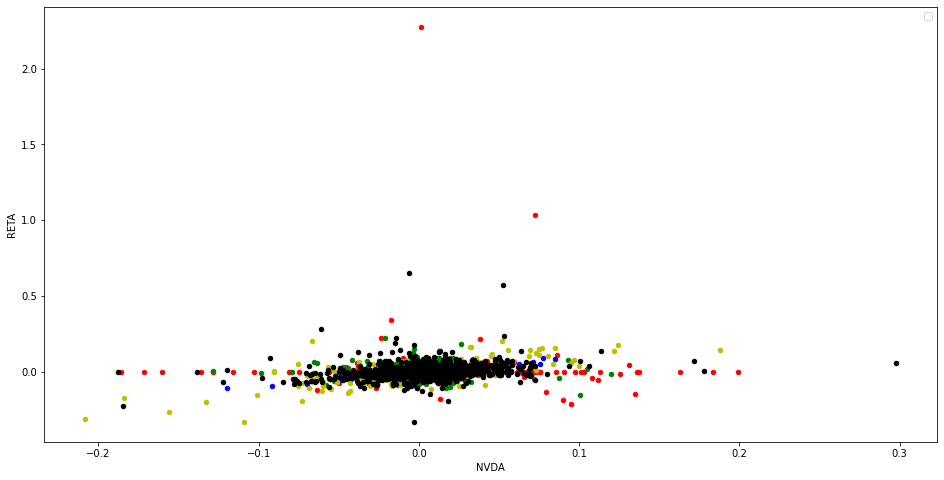

In [ ]:
ax1 = returns.plot(kind='scatter', x='TSLA', y='NKLA', color='r')    
ax2 = returns.plot(kind='scatter', x='AAPL', y='ZM', color='g', ax=ax1)    
ax3 = returns.plot(kind='scatter', x='QQQ', y='SPY', color='b', ax=ax1)
ax4 = returns.plot(kind='scatter', x='AIG', y='CCL', color='y', ax=ax1)
ax5 = returns.plot(kind='scatter', x='NVDA', y='RETA', color='black', ax=ax1,figsize=(16,8))
plt.legend()
print(ax1 == ax2 == ax3==ax4==ax5)  # True 

In [ ]:
returns.describe().round(1)

,AAPL,ADP,AIG,ARLO,AXP,BMRN,CCL,DAL,DFS,DMLRY,EBAY,EVER,FEYE,GE,GLPG,HAE,HAL,HTBX,INTC,JWN,KODK,LI,MAR,NAK,NKLA,NSANY,NVAX,NVDA,OSPN,OSUR,PCRFY,PLCE,PRMW,PRPH,QCOM,QDEL,QQQ,RETA,RLFTF,ROKU,SIRI,SPCE,SPY,SVC,TAC,TAOP,TNXP,TSLA,VWAPY,WMT,ZM
count,1256.0,1256.0,1256.0,522.0,1256.0,1256.0,1256.0,1256.0,1256.0,1256.0,1256.0,547.0,1256.0,1256.0,1256.0,1256.0,1256.0,1256.0,1256.0,1256.0,1256.0,22.0,1256.0,1256.0,186.0,1256.0,1256.0,1256.0,1256.0,1256.0,1256.0,1256.0,238.0,1256.0,1256.0,1256.0,1256.0,1073.0,101.0,735.0,1256.0,373.0,1256.0,1256.0,1256.0,1256.0,1256.0,1256.0,1256.0,1256.0,345.0
mean,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0
std,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.1,0.1,0.0,0.1,0.2,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.7,0.1,0.0,0.1,0.0,0.0,0.0,0.1,0.1,0.0,0.0,0.0,0.0
min,-0.1,-0.2,-0.2,-0.5,-0.1,-0.4,-0.3,-0.3,-0.3,-0.2,-0.1,-0.4,-0.2,-0.2,-0.3,-0.1,-0.4,-0.6,-0.2,-0.2,-0.3,-0.2,-0.2,-0.4,-0.2,-0.1,-0.8,-0.2,-0.4,-0.3,-0.1,-0.3,-0.2,-0.2,-0.2,-0.2,-0.1,-0.3,-0.7,-0.2,-0.1,-0.2,-0.1,-0.3,-0.2,-0.6,-0.7,-0.2,-0.5,-0.1,-0.2
25%,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.1,0.1,0.2,0.3,0.2,0.1,0.2,0.2,0.3,0.2,0.1,0.5,0.2,0.1,0.2,0.2,0.3,1.6,0.2,0.2,3.2,0.3,0.2,0.7,2.3,0.1,0.7,0.3,0.2,0.4,0.1,0.3,0.3,0.5,0.2,0.3,0.1,0.6,4.1,0.5,0.1,0.3,0.1,0.5,0.2,3.3,1.2,0.2,0.2,0.1,0.2


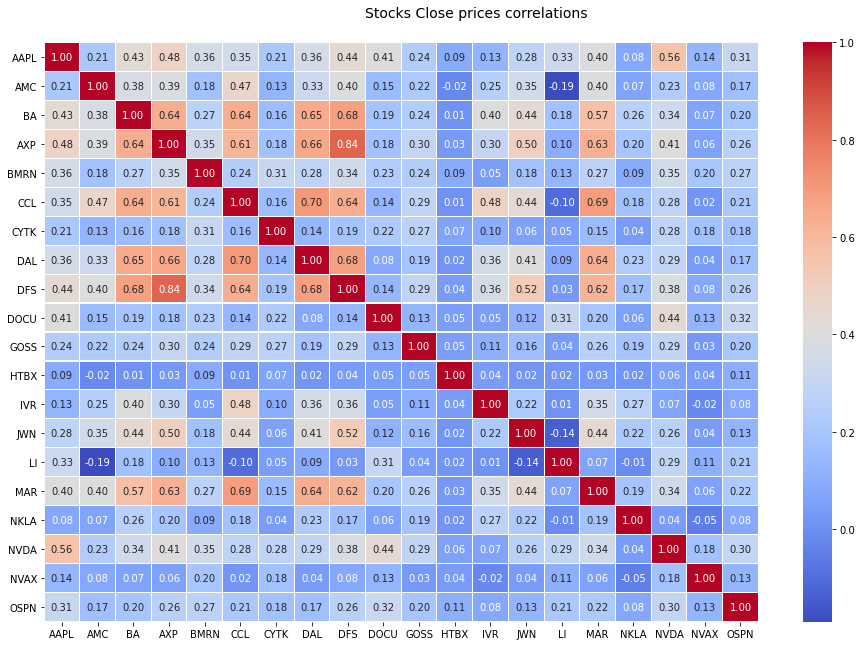

In [ ]:
f, ax = plt.subplots(figsize=(16, 10))
corr = returns.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18,19,20]].corr()
hm = sn.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Stocks Close prices correlations', fontsize=14)

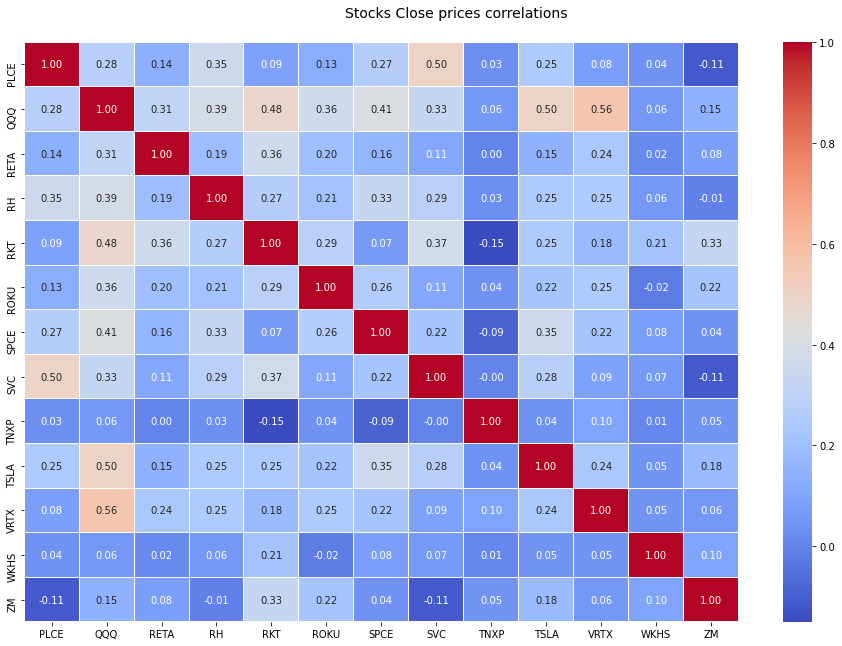

In [ ]:
f, ax = plt.subplots(figsize=(16, 10))
corr = returns.iloc[:,[21,22,23,24,25,26,27,28,29,30,31,32,33]].corr()
hm = sn.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Stocks Close prices correlations', fontsize=14)

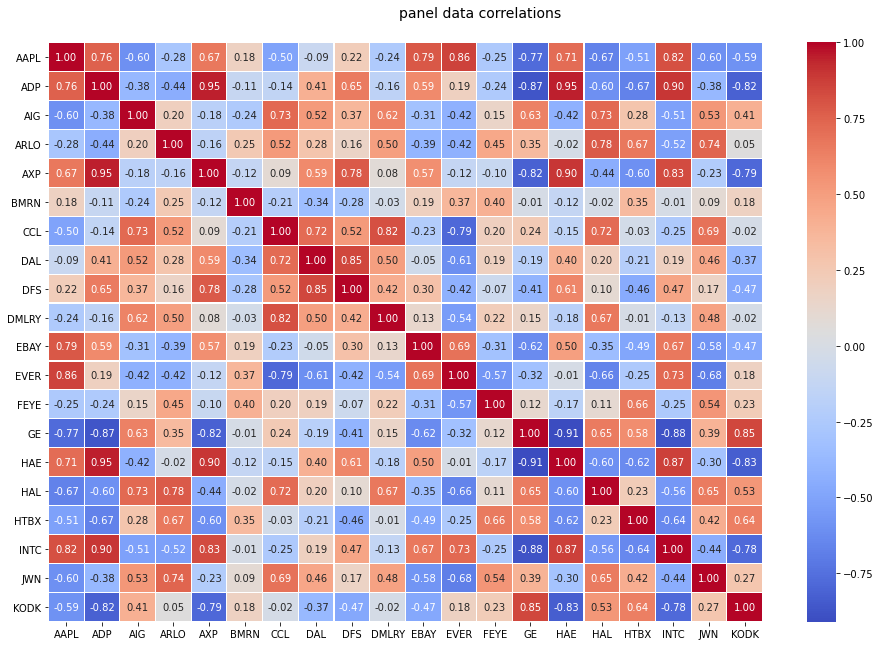

In [ ]:
import seaborn as sn
f, ax = plt.subplots(figsize=(16, 10))
corr = price.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18,19,20]].corr()
hm = sn.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('panel data correlations', fontsize=14)

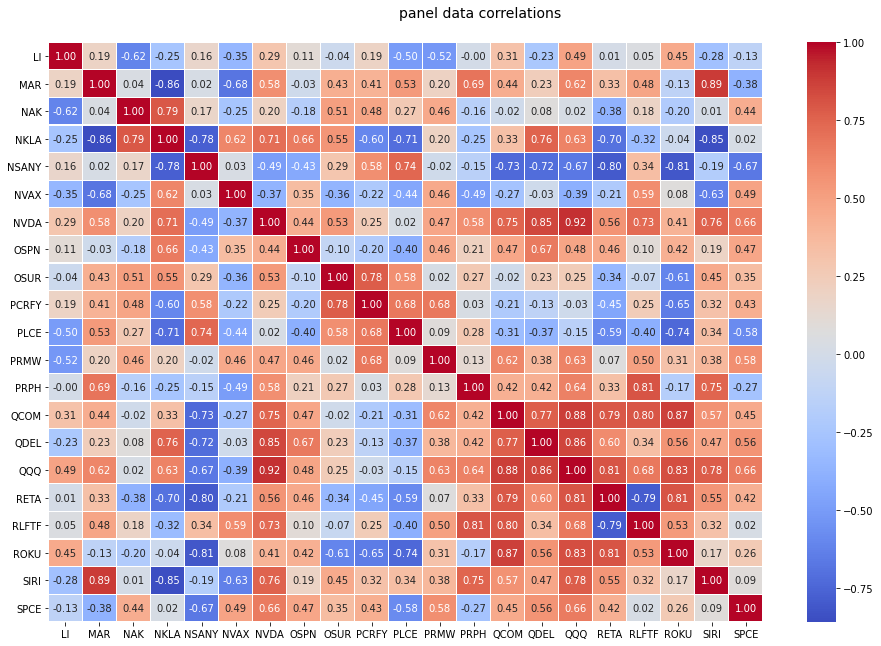

In [ ]:
f, ax = plt.subplots(figsize=(16, 10))
corr = price.iloc[:,[21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41]].corr()
hm = sn.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('panel data correlations', fontsize=14)

In [ ]:
#many stocks 
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
import pandas as pd
all_data = {ticker: web.get_data_yahoo(ticker)
     for ticker in ['^DJI','^GSPC']}
price = pd.DataFrame({ticker: data['Adj Close']
     for ticker, data in all_data.items()})
volume = pd.DataFrame({ticker: data['Volume']
     for ticker, data in all_data.items()})   

In [ ]:
price.round(2)

,^DJI,^GSPC
Date,,
2015-06-04,17905.58,2095.84
2015-06-05,17849.46,2092.83
2015-06-08,17766.55,2079.28
2015-06-09,17764.04,2080.15
2015-06-10,18000.40,2105.20
...,...,...
2020-05-26,24995.11,2991.77
2020-05-27,25548.27,3036.13
2020-05-28,25400.64,3029.73


In [ ]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [ ]:
X,y=make_moons(n_samples=100,noise=0.15)
polynomial_svm_clf=Pipeline([
                             ('poly_features',PolynomialFeatures(degree=3)),
                             ('scaler',StandardScaler()),
                             ('svm_clf',LinearSVC(C=10,loss='hinge'))
])
polynomial_svm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [ ]:
!pip install arch

In [ ]:
#GARCH MODELS PYTHON http://barnesanalytics.com/garch-models-in-python
#https://machinelearningmastery.com/develop-arch-and-garch-models-for-time-series-forecasting-in-python/
#import datetime as dt
'''import sys
from pandas_datareader import  data,wb
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from arch import arch_model
#get the data
sp500=data.DataReader(['^GSPC'],data_source='yahoo',start='1/1/1970')
returns = 100 * sp500['Close'].pct_change().dropna()
returns.plot()
plt.show()

model=arch_model(returns, vol='Garch', p=1, o=0, q=1, dist='Normal')
results=model.fit()
print(results.summary())

forecasts = results.forecast(horizon=30, method='simulation', simulations=1000)
sims = forecasts.simulations

lines = plt.plot(sims.values[-1,:,:].T, color='blue', alpha=0.01)
lines[0].set_label('Simulated paths')
plt.show()

print(np.percentile(sims.values[-1,:,-1].T,5))
plt.hist(sims.values[-1, :,-1],bins=50)
plt.title('Distribution of Returns')
plt.show()'''

"import sys\nfrom pandas_datareader import  data,wb\nimport numpy as np\nimport pandas as pd\n\nimport matplotlib.pyplot as plt\nfrom arch import arch_model\n#get the data\nsp500=data.DataReader(['^GSPC'],data_source='yahoo',start='1/1/1970')\nreturns = 100 * sp500['Close'].pct_change().dropna()\nreturns.plot()\nplt.show()\n\nmodel=arch_model(returns, vol='Garch', p=1, o=0, q=1, dist='Normal')\nresults=model.fit()\nprint(results.summary())\n\nforecasts = results.forecast(horizon=30, method='simulation', simulations=1000)\nsims = forecasts.simulations\n\nlines = plt.plot(sims.values[-1,:,:].T, color='blue', alpha=0.01)\nlines[0].set_label('Simulated paths')\nplt.show()\n\nprint(np.percentile(sims.values[-1,:,-1].T,5))\nplt.hist(sims.values[-1, :,-1],bins=50)\nplt.title('Distribution of Returns')\nplt.show()"

In [ ]:

# Python code to demonstrate string length  
# using for loop 
  
# Returns length of string 
str={'a','e','i','o','u'}
def findLen(str): 
    counter = 0    
    for i in str: 
        counter += 1

    return counter 
  
print(findLen(str))

5


In [ ]:
def countPerms(n):
  n="vincent"
  i='v'
  if i in n:
    counter=0
    counter +=1
  else:
    return counter
n="vincent"
print(countPerms(n))

None


In [ ]:
def countPerms(n):
  a_string="Abcde"
  lowercase=a_string.lower()
  vowel_counts={}
  for n in "aeiou":
    count=lower.case(n)
    vowel_counts[n]=count
print(countPerms)

<function countPerms at 0x7f015e154d08>


In [ ]:
def Check_Vow(string, vowels): 
    final = [each for each in string if each in vowels] 
    print(len(final)) 
    print(final) 
       
string = "Vincent is here"
vowels = "AaEeIiOoUu"
Check_Vow(string, vowels);

5
['i', 'e', 'i', 'e', 'e']


In [ ]:
def countPerms(n,x):
    word=[i for i in n if i in x]
    print(len(word))
    print(word)
n='Vincent is smart'
x="AaEeIiOoUu"
countPerms(n,x);

4
['i', 'e', 'i', 'a']


In [ ]:
import numpy as np
import numpy as np
x=np.array([[0,1,2,3],[4,5,6,7]])
print("Number of array:")
print(x)
print("Sum of all element:")
print(np.sum(x))
print("Sum of each column:")
print(np.sum(x,axis=0))
print("Sum of each row:")
print(np.sum(x,axis=1))

Number of array:
[[0 1 2 3]
 [4 5 6 7]]
Sum of all element:
28
Sum of each column:
[ 4  6  8 10]
Sum of each row:
[ 6 22]


In [ ]:
vince="good"
tanoe="teacher"
list_word=['my','teacher','is','good']
if vince in list_word:
  print(list_word.index(vince))
else:
  if tanoe in list_word:
    print(list_word.index('tanoe'))


3


In [ ]:
#Analysis of elections day
msft=data.DataReader(['^GSPC'],data_source='yahoo',start='1/1/1900')
msft['Close'].head(3).round()

Symbols,^GSPC
Date,
1927-12-30,18.0
1928-01-03,18.0
1928-01-04,18.0


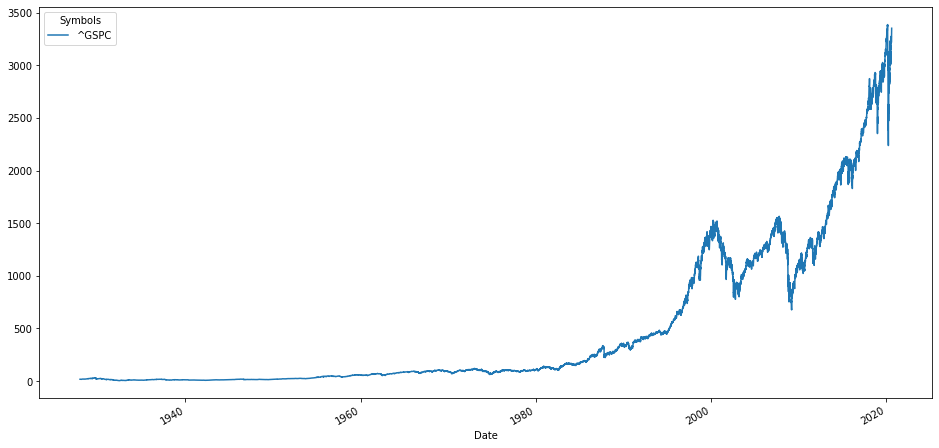

In [ ]:
msft['Adj Close'].plot(figsize=(16,8));

In [ ]:
msft_one=msft.resample('QS').median()
msft_one.tail().round() 

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,,
2019-07-01,2977.0,2977.0,2987.0,2962.0,2979.0,3305120000
2019-10-01,3094.0,3094.0,3098.0,3082.0,3088.0,3472745000
2020-01-01,3245.0,3245.0,3259.0,3233.0,3243.0,4001320000
2020-04-01,2930.0,2930.0,2955.0,2912.0,2931.0,5567400000
2020-07-01,3227.0,3227.0,3241.0,3206.0,3224.0,4476170000


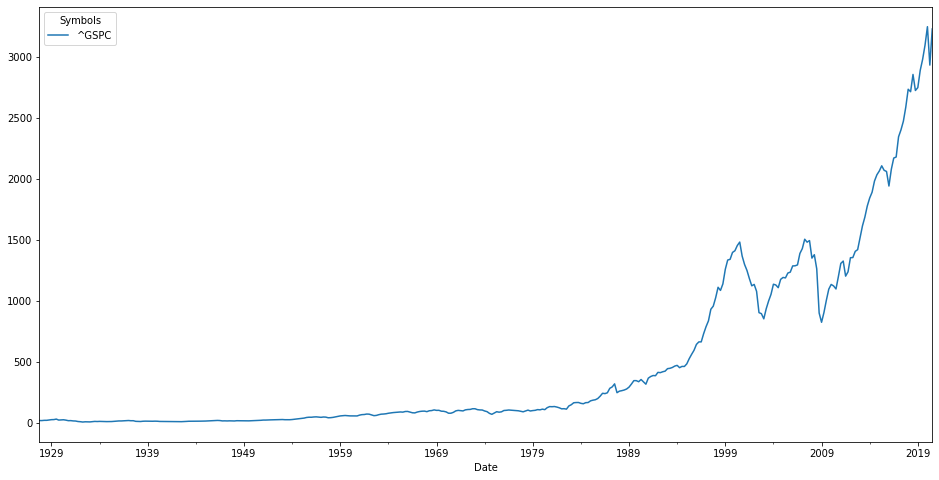

In [ ]:
msft_one['Adj Close'].plot(figsize=(16,8));

In [ ]:
msft_two=msft.resample('YS').median()
msft_two.head().round() 

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,,
1927-01-01,18.0,18.0,18.0,18.0,18.0,0
1928-01-01,20.0,20.0,20.0,20.0,20.0,0
1929-01-01,26.0,26.0,26.0,26.0,26.0,0
1930-01-01,21.0,21.0,21.0,21.0,21.0,0
1931-01-01,14.0,14.0,14.0,14.0,14.0,0


In [ ]:
sp=pd.read_csv('sp_ele.csv')
sp.head()

,Year,Party,Popular_Vote,sp,volume
0,1928,R,21427123.0,19.55,0.0
1,1932,D,22821277.0,7.01,0.0
2,1936,D,27752648.0,15.19,0.0
3,1940,D,27313945.0,10.73,0.0
4,1944,D,25612916.0,12.64,0.0


In [ ]:
sp[['sp','volume','Party']].groupby('Party').mean().round()

,sp,volume
Party,,
D,338.0,751254583.0
R,501.0,594031364.0


In [ ]:
sp[['sp','volume','Party']].groupby('Party').median().round()

,sp,volume
Party,,
D,69.0,3892500.0
R,117.0,44040000.0


In [ ]:
sp[['sp','volume','Party']].groupby('Party').std().round()

,sp,volume
Party,,
D,508.0,1.626891e+09
R,716.0,1.158197e+09


In [ ]:
# making boolean series for a team name 
sp1=sp.copy()
Demo = sp1["Party"]=="D"  
# filtering data 
sp1.where(Demo, inplace = True)   
# display 
D=sp1.dropna()


In [ ]:
D

,Year,Party,Popular_Vote,sp,volume
1,1932.0,D,22821277.0,7.01,0.000000e+00
2,1936.0,D,27752648.0,15.19,0.000000e+00
3,1940.0,D,27313945.0,10.73,0.000000e+00
4,1944.0,D,25612916.0,12.64,0.000000e+00
5,1948.0,D,24179347.0,15.55,0.000000e+00
8,1960.0,D,34220984.0,55.78,2.965000e+06
9,1964.0,D,43127041.0,81.46,4.820000e+06
12,1976.0,D,40831881.0,102.10,1.935000e+07
16,1992.0,D,44909806.0,414.93,1.986150e+08
17,1996.0,D,47401185.0,662.33,4.131500e+08


In [ ]:
sp2=sp.copy()
R = sp2["Party"]=="R"  
# filtering data 
sp2.where(R, inplace = True)   
# display 
R=sp2.dropna()
R

,Year,Party,Popular_Vote,sp,volume
0,1928.0,R,21427123.0,19.55000,0.000000e+00
6,1952.0,R,34075529.0,24.45000,1.210000e+06
7,1956.0,R,35579180.0,46.52000,2.210000e+06
10,1968.0,R,31783783.0,98.63000,1.308500e+07
11,1972.0,R,47168710.0,108.55000,1.625000e+07
13,1980.0,R,43903230.0,117.46000,4.404000e+07
14,1984.0,R,54455472.0,161.75000,8.706000e+07
15,1988.0,R,48886597.0,267.22000,1.550100e+08
18,2000.0,R,50456002.0,1435.39000,1.026650e+09
19,2004.0,R,62040610.0,1126.76000,1.422700e+09


In [ ]:
R['R_return']=R['sp'].pct_change()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
R['R_return'].mean()

0.8509187193143809

In [ ]:
D['D_return']=D['sp'].pct_change()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
D['D_return'].mean()

0.8420315044169737

In [ ]:
sp[['sp','volume','Party']].groupby('Party').max().round()

,sp,volume
Party,,
D,1384.0,4.734240e+09
R,2104.0,3.766130e+09


In [ ]:
sp[['sp','volume','Party']].groupby('Party').min().round()

,sp,volume
Party,,
D,7.0,0.0
R,20.0,0.0


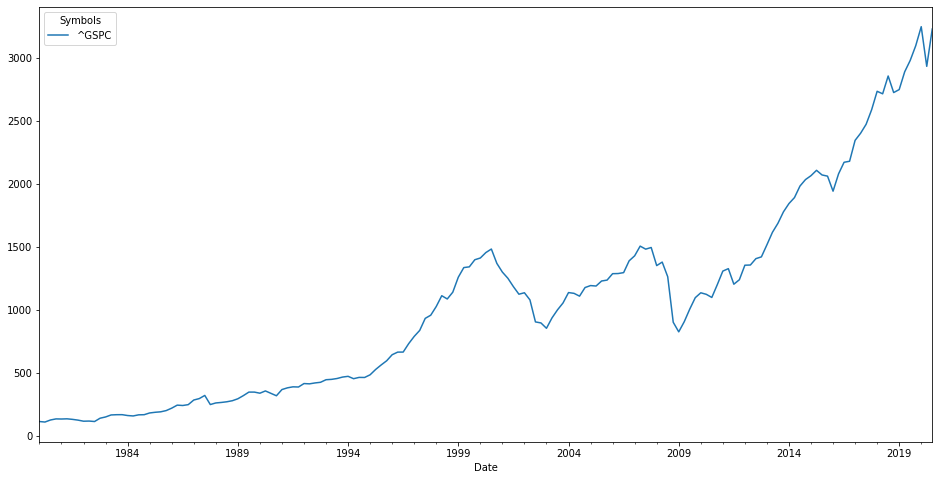

In [ ]:
msft_one['Adj Close'].loc['1980-01-01':,:].plot(figsize=(16,8));

ANALYSIS OF USA PRESIDENTIAL DATA

In [ ]:
spq=pd.read_csv('spq.csv')
spq.head()

,year,Adj Close,Volume,Party
0,1/1/28,17.549999,0,R
1,4/1/28,19.520000,0,R
2,7/1/28,19.580000,0,R
3,10/1/28,22.500000,0,R
4,1/1/29,24.974999,0,R


In [ ]:
spq[['Adj Close','Volume','Party']].groupby('Party').mean().round()

,Adj Close,Volume
Party,,
D,419.0,764900859.0
R,554.0,737287318.0


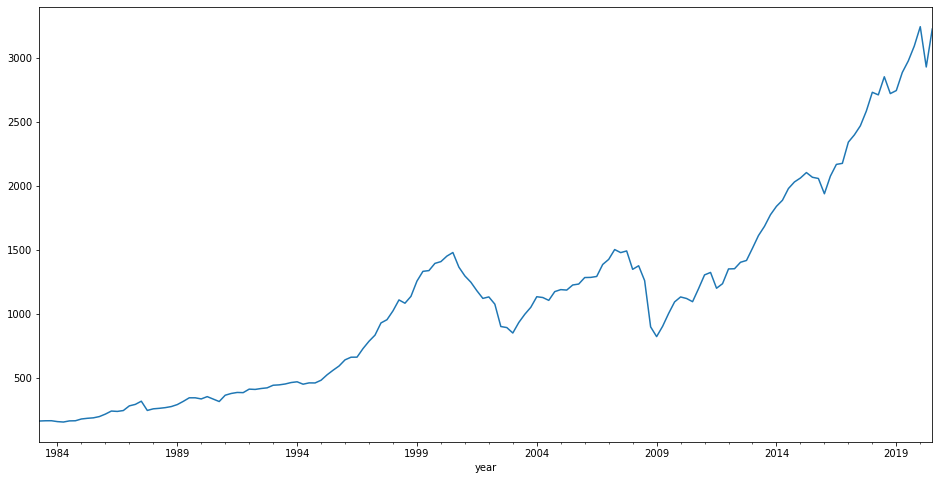

In [ ]:
spq1 = spq.set_index(pd.DatetimeIndex(spq['year']))
spq1['Adj Close'].tail(150).plot(figsize=(16,8));


<Figure size 2160x1080 with 0 Axes>

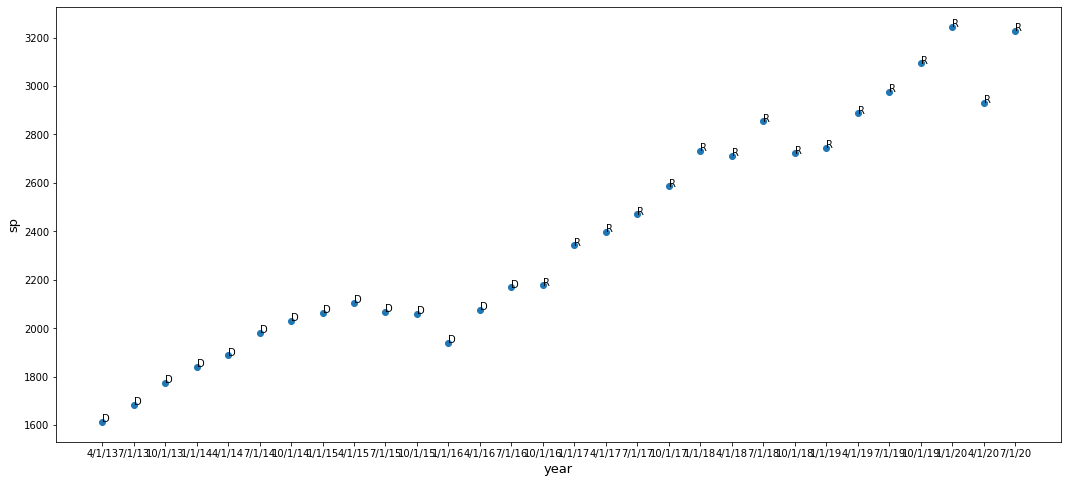

In [ ]:
fig = plt.figure(figsize = (30,15))
fig, ax = plt.subplots(figsize = (18,8))
ax.scatter(spq1['year'].tail(30), 
           spq1['Adj Close'].tail(30))
ax.set_xlabel('year', fontsize = 13)
ax.set_ylabel('sp', fontsize = 13)
#ax.set_title('World Bank Survey Borrowing questions versus Composite Index of Financial paper', 
             #fontsize = 11);

for i, txt in enumerate(spq1['Party'].tail(30)):
    ax.annotate(txt, (spq1['year'].tail(30)[i],
                      spq1['Adj Close'].tail(30)[i]));

In [ ]:
# making boolean series for a team name 
sp3=spq1.copy()
Dem = sp3["Party"]=="D"  
# filtering data 
sp3.where(Dem, inplace = True)   
# display 
D1=sp3.dropna()
D1

,year,Adj Close,Volume,Party
year,,,,
2032-10-01,10/1/32,6.920000,0.000000e+00,D
2033-01-01,1/1/33,6.620000,0.000000e+00,D
2033-04-01,4/1/33,8.890000,0.000000e+00,D
2033-07-01,7/1/33,10.760000,0.000000e+00,D
2033-10-01,10/1/33,9.810000,0.000000e+00,D
...,...,...,...,...
2015-07-01,7/1/15,2068.199951,3.641400e+09,D
2015-10-01,10/1/15,2058.744995,3.934370e+09,D
2016-01-01,1/1/16,1939.380005,4.570670e+09,D


In [ ]:
sp4=spq1.copy()
Rep = sp4["Party"]=="R"  
# filtering data 
sp4.where(Rep, inplace = True)   
# display 
R1=sp4.dropna()
R1

,year,Adj Close,Volume,Party
year,,,,
2028-01-01,1/1/28,17.549999,0.000000e+00,R
2028-04-01,4/1/28,19.520000,0.000000e+00,R
2028-07-01,7/1/28,19.580000,0.000000e+00,R
2028-10-01,10/1/28,22.500000,0.000000e+00,R
2029-01-01,1/1/29,24.974999,0.000000e+00,R
...,...,...,...,...
2019-07-01,7/1/19,2977.180054,3.305120e+09,R
2019-10-01,10/1/19,3093.619995,3.472745e+09,R
2020-01-01,1/1/20,3244.954956,4.001320e+09,R


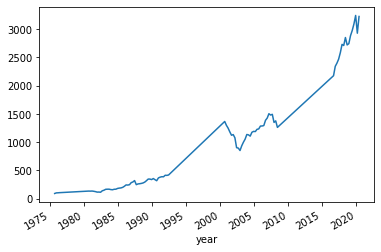

In [ ]:
R1['Adj Close'].tail(100).plot()

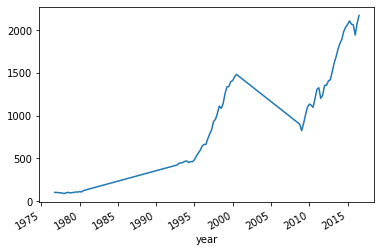

In [ ]:
D1['Adj Close'].tail(80).plot()

In [ ]:
D1['return']=D1['Adj Close'].pct_change()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
D1['return'].mean()*100

4.17987061123665

In [ ]:
R1['return']=R1['Adj Close'].pct_change()
R1['return'].mean()*100

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


4.786969619427545

In [ ]:
D1[['Adj Close','Party']].groupby('Party').var()

,Adj Close
Party,
D,379076.518825


In [ ]:
spq1['return']=spq1['Adj Close'].pct_change()
spq1['return'].mean()*100

1.74143674520473

In [ ]:
msft.tail()

Attributes,Adj Close,Close,High,Low,Open,Volume,return
Symbols,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,
Date,,,,,,,
2020-08-03,3294.610107,3294.610107,3302.729980,3284.530029,3288.260010,4643640000,0.007181
2020-08-04,3306.510010,3306.510010,3306.840088,3286.370117,3289.919922,4621670000,0.003612
2020-08-05,3327.770020,3327.770020,3330.770020,3317.370117,3317.370117,4732220000,0.006430
2020-08-06,3349.159912,3349.159912,3351.030029,3318.139893,3323.169922,4267490000,0.006428
2020-08-07,3351.280029,3351.280029,3352.540039,3328.719971,3340.050049,4104860000,0.000633


In [ ]:
msft['return']=msft['Adj Close'].pct_change()
msft['return'].mean()*100

0.029768189115387693

In [ ]:
spq[['Adj Close','Party']].groupby('Party').var().round()

,Adj Close
Party,
D,379077.0
R,669456.0


In [ ]:
game_running = True

#a while loop: while condition is met, run code block inside loop
#while game_running is True , run code block inside loop
while (game_running):

    altitude = 100.0 #meters 
    velocity = 0.0  #meters per second 
    fuel_level = 100.0 #liters
    seconds = 0.0 #The number of seconds to landing 

    #while loop: while condition is met, run code block inside loop
    while (altitude > 0):
        #Get the amount of fuel to burn from the player/pilot
        burn_fuel = float(input("Enter the amount of fuel to burn: "))

        #The velocity increases by 1.6 meters per second each turn
        VEL_INCREASE = 1.6
        #The volocity decreases by a factor (0.15) of the amount of fuel burned
        vel_decrease = 0.15 * burn_fuel
        
        #Analyze player's input and display game data

        #Check if the amount of fuel to burn is <= 0
        if (burn_fuel <= 0):
            fuel_level = fuel_level
            velocity = velocity + VEL_INCREASE - vel_decrease
            velocity = round(velocity, 2) #round to nearest hundredth
            altitude = altitude - velocity
            altitude = round(altitude, 2) #round to nearest hundredth
            seconds += 1
            print("Your current altitude is: ", altitude)
            print("Your current velocity is: ", velocity)
            print("Your current fuel level is: ", fuel_level)
            
        #Check if the amount of fuel to burn is >= current fuel level   
        elif (burn_fuel >= fuel_level):
            fuel_level = 0
            velocity = velocity + VEL_INCREASE - vel_decrease
            velocity = round(velocity, 2) #round to nearest hundredth
            altitude = altitude - velocity
            altitude = round(altitude, 2) #round to nearest hundredth
            seconds += 1
            print("Your current altitude is: ", altitude)
            print("Your current velocity is: ", velocity)
            print("Your current fuel level is: ", fuel_level)
            
        #Check if the amount of fuel to burn is < current fuel level 
        elif (burn_fuel < fuel_level):
            fuel_level = fuel_level - burn_fuel
            fuel_level = round(fuel_level, 2) #round to nearest hundredth 
            velocity = velocity + VEL_INCREASE - vel_decrease
            velocity = round(velocity, 2) #round to nearest hundredth
            altitude = altitude - velocity
            altitude = round(altitude, 2) #round to nearest hundredth
            seconds += 1
            print("Your current altitude is: ", altitude)
            print("Your current velocity is: ", velocity)
            print("Your current fuel level is: ", fuel_level)
            
        #Check if the amount of fuel to burn is a number
        else:
            print("The amount of fuel to be burned must be a NUMBER")
            continue
        
    #Analyze game data and display final results
    if (altitude <= 0):
        if (velocity < 10):
            print("Congrats! You Won!")
            print("Your landing parameters are: ")
            print("Velocity: ", velocity)
            print("Fuel level: ", fuel_level)
            print("Time: ", seconds, "seconds")

        else:
            print("Disaster! You crash-landed!")
            print("Your landing parameters are: ")
            print("Velocity: ", velocity)
            print("Fuel level: ", fuel_level)
            print("Time: ", seconds, "seconds")

    #Have the player decides whether to play another round
    next_round = input("Would you like to play another round? ")
    
    #check if the answer starts with the letter "y"
    if (next_round[0] == "Y" or "y"):
        
        continue

    #Check if the answer starts with the letter "n"
    if (next_round[0] == "N" or "n"):
        
        break

    #Check if the answer starts with any other letter
    else:
        next_round = input("Would you like to play another round? ")

In [ ]:
print(df.head(5))
print(df.tail(5))

               Open     High      Low    Close  Volume Currency
Date                                                           
2014-04-29  45000.0  45000.0  45000.0  45000.0     211      XOF
2014-04-30  45000.0  45000.0  45000.0  45000.0      58      XOF
2014-05-02  41625.0  41625.0  41625.0  41625.0     546      XOF
2014-05-05  44500.0  44500.0  44500.0  44500.0      45      XOF
2014-05-06  44005.0  44005.0  44005.0  44005.0     130      XOF
              Open    High     Low   Close  Volume Currency
Date                                                       
2019-12-23  1445.0  1445.0  1445.0  1445.0    1136      XOF
2019-12-24  1500.0  1500.0  1500.0  1500.0   13827      XOF
2019-12-27  1600.0  1600.0  1600.0  1600.0   16836      XOF
2019-12-30  1510.0  1510.0  1510.0  1510.0   12660      XOF
2019-12-31  1600.0  1600.0  1600.0  1600.0  317491      XOF


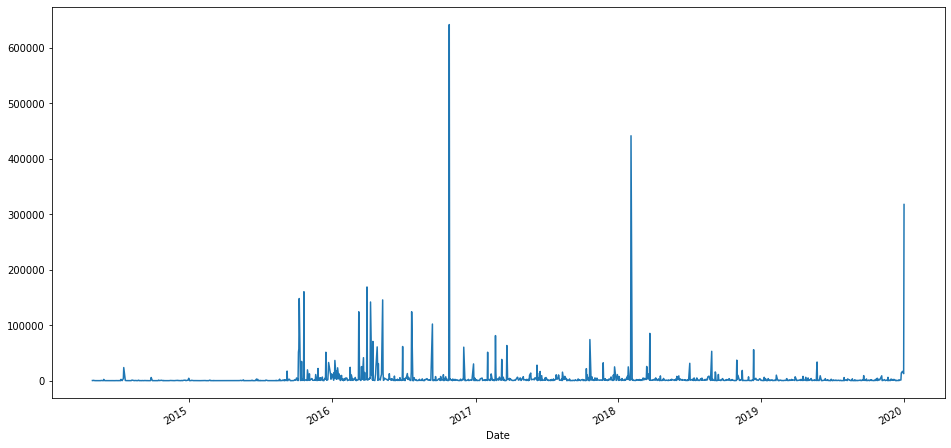

In [ ]:
df.Volume.plot(figsize=(16,8));

In [ ]:
df.Close.median()

3400.0

In [ ]:
df.describe().round(2)

,Open,High,Low,Close,Volume
count,1359.00,1359.00,1359.00,1359.00,1359.00
mean,17274.44,17274.44,17274.44,17274.44,4691.86
std,27063.11,27063.11,27063.11,27063.11,26266.87
min,1110.00,1110.00,1110.00,1110.00,0.00
25%,1580.00,1580.00,1580.00,1580.00,153.50
50%,3400.00,3400.00,3400.00,3400.00,672.00
75%,4500.00,4500.00,4500.00,4500.00,2048.50
max,86500.00,86500.00,86500.00,86500.00,641700.00


In [ ]:
#many stocks 
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
import pandas as pd
all_data = {ticker: web.get_data_yahoo(ticker)
     for ticker in ['ATAX','ASRV','VEL','SMLP','ALEAF','SND',
                    'QTRHF','SOHO','JOB','AESE','VVCIF','SGBX','KSHB','RMED']}
price1 = pd.DataFrame({ticker: data['Adj Close']
     for ticker, data in all_data.items()})
volume = pd.DataFrame({ticker: data['Volume']
     for ticker, data in all_data.items()})  

In [ ]:
price1.head()

,ATAX,ASRV,VEL,SMLP,ALEAF,SND,QTRHF,SOHO,JOB,AESE,VVCIF,SGBX,KSHB,RMED
Date,,,,,,,,,,,,,,
2015-10-15,3.650779,2.978759,NaN,11.198876,NaN,NaN,NaN,4.606380,6.90,NaN,NaN,NaN,NaN,NaN
2015-10-16,3.644082,2.906106,NaN,11.337135,NaN,NaN,NaN,4.606380,6.69,NaN,NaN,NaN,NaN,NaN
2015-10-19,3.590491,2.869779,NaN,11.176755,NaN,NaN,NaN,4.578672,7.10,NaN,NaN,NaN,NaN,NaN
2015-10-20,3.637382,3.042329,NaN,11.060619,NaN,NaN,NaN,4.564820,7.11,NaN,NaN,NaN,NaN,NaN
2015-10-21,3.583793,3.042329,NaN,11.060619,NaN,NaN,NaN,4.460915,7.15,NaN,NaN,NaN,NaN,NaN


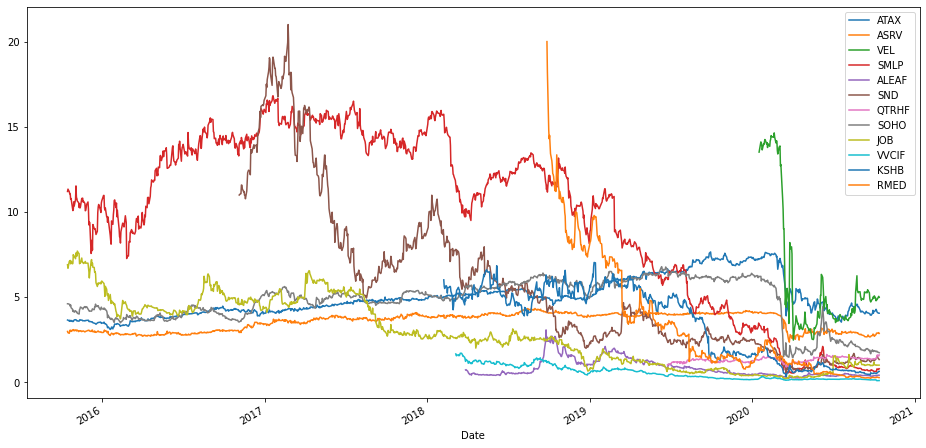

In [ ]:
price1.iloc[:,[0,1,2,3,4,5,6,7,8,10,12,13]].plot(figsize=(16,8));

***********************************
***********************************


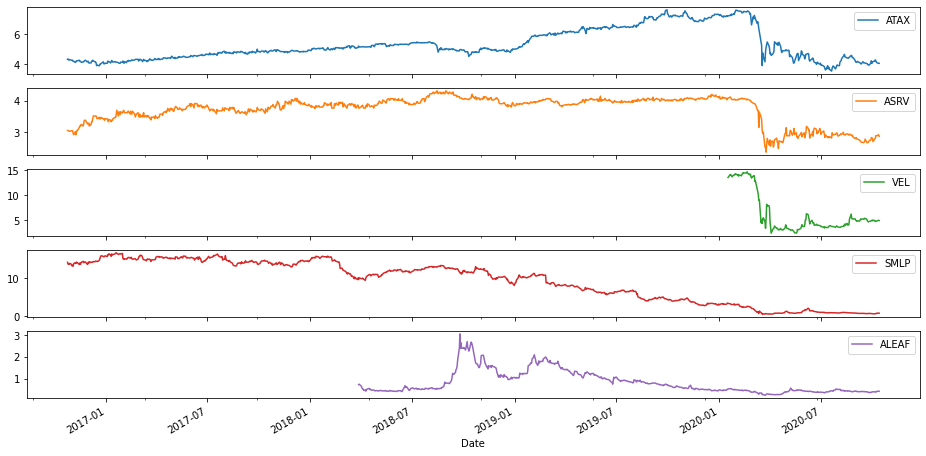

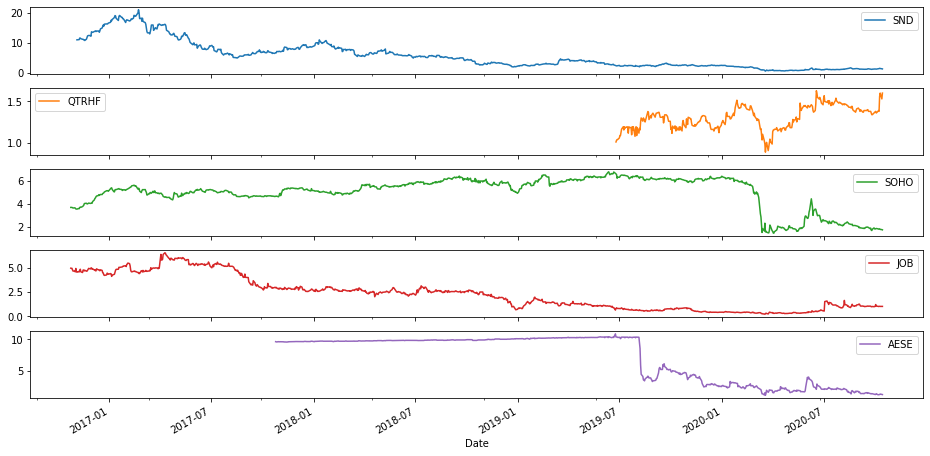

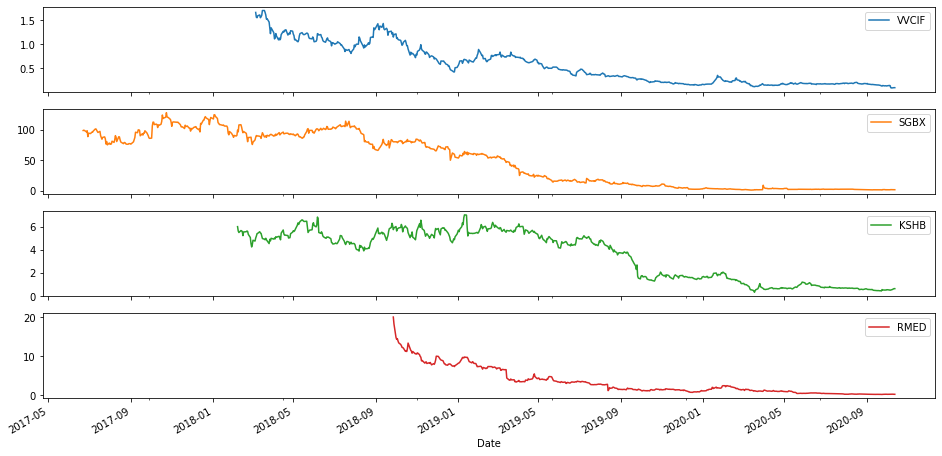

In [ ]:
print(price1.iloc[:,:5].tail(1000).plot(subplots=True,figsize=(16,8)));
print('***********************************')
print(price1.iloc[:,5:10].tail(1000).plot(subplots=True,figsize=(16,8)));
print('***********************************')
print(price1.iloc[:,10:].tail(1000).plot(subplots=True,figsize=(16,8)));

In [ ]:
price1['SGBX'].max()

127.4000015258789

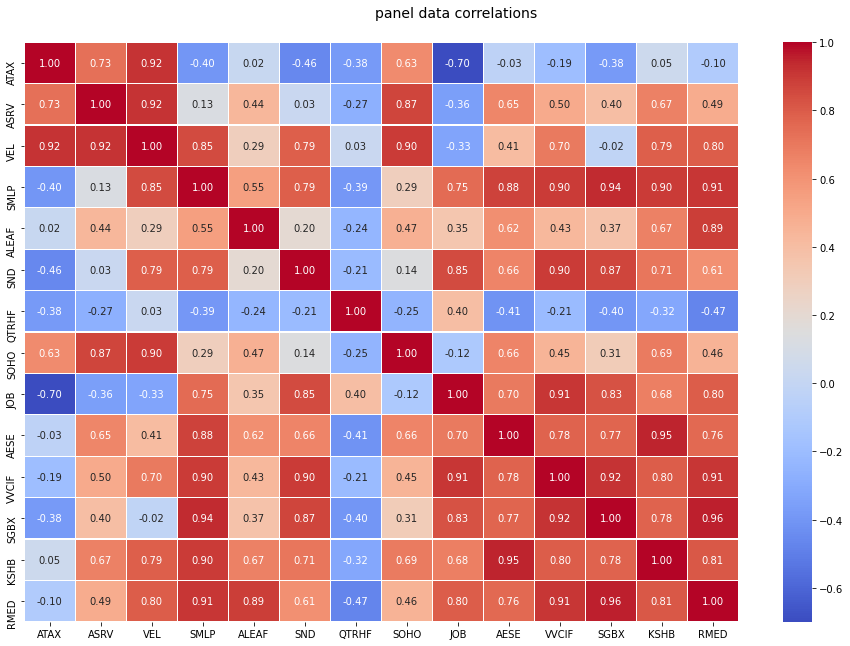

In [ ]:
f, ax = plt.subplots(figsize=(16, 10))
corr = price1.iloc[:,:].corr()
hm = sn.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('panel data correlations', fontsize=14)

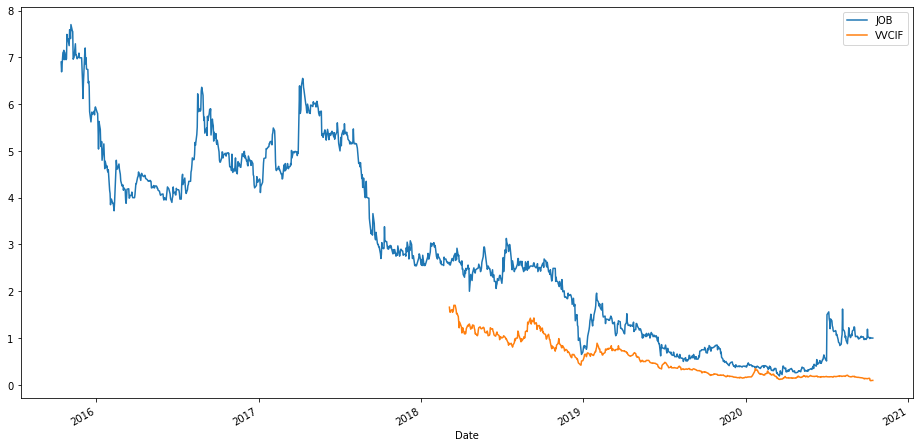

In [ ]:
price1[['JOB','VVCIF']].plot(figsize=(16,8));

In [ ]:
Soho=price1['SGBX']/price1['SGBX'].shift(1)
print('Soho return mean :', Soho.mean())
print('Soho return median :', Soho.median())

Soho return mean : 1.000018053548322
Soho return median : 0.9944134130299619


In [ ]:
price1['Soho']=price1['SOHO'].pct_change()
price1['Soho'].dropna()

Date
2015-10-16    0.000000
2015-10-19   -0.006015
2015-10-20   -0.003025
2015-10-21   -0.022762
2015-10-22    0.017081
                ...   
2020-10-07    0.011173
2020-10-08    0.005525
2020-10-09   -0.027473
2020-10-12   -0.011299
2020-10-13   -0.011429
Name: Soho, Length: 1257, dtype: float64

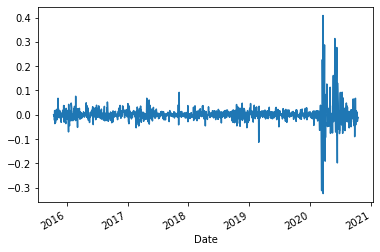

In [ ]:
price1['Soho'].plot()

In [ ]:
def function(x):
  for x in range(1,51):
     if x%3==0 and x%5==0:
       print('read')
     elif x<3:
         print('blue')
     else:
       print('green')


In [ ]:
#many stocks 
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
import pandas as pd
all_data = {ticker: web.get_data_yahoo(ticker)
     for ticker in ['BAC','JPM','DIS','WFC','USB','C','COF']}
price = pd.DataFrame({ticker: data['Adj Close']
     for ticker, data in all_data.items()})
volume = pd.DataFrame({ticker: data['Volume']
     for ticker, data in all_data.items()}) 

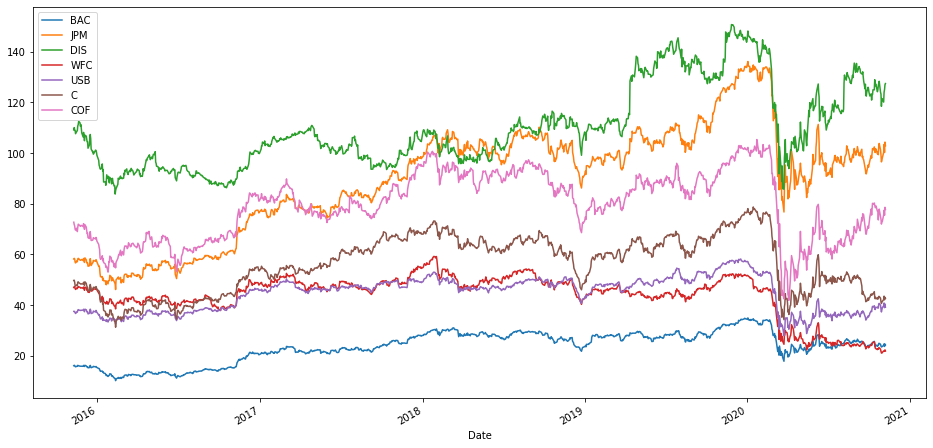

In [ ]:
price.plot( figsize=(16,8));

In [ ]:
price.head()

,BAC,JPM,DIS,WFC,USB,C,COF
Date,,,,,,,
2015-11-09,16.077957,58.210457,109.136063,46.930641,37.507614,49.749794,72.718643
2015-11-10,16.232555,58.460957,110.073502,47.302895,37.524914,49.830166,71.751480
2015-11-11,16.141615,58.175915,109.229813,47.209835,37.498962,49.026451,71.290497
2015-11-12,15.796051,57.009804,108.939201,46.676819,36.971046,47.740513,69.943665
2015-11-13,15.641454,56.629742,107.654915,46.169186,36.676800,47.481544,69.573059


In [ ]:
x=data.DataReader(['DIS','FDX','WM','MCD','QCOM','SQ','ACT','DDD','AL','IPGP'],data_source='yahoo',start='1/1/1970')

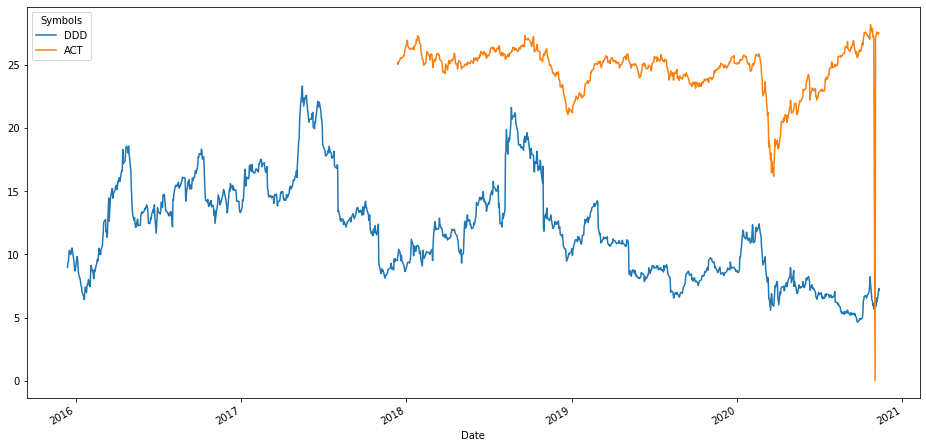

In [ ]:
x['Close'].loc['2015-12-12':,['DDD','ACT']].plot(figsize=(16,8));

In [ ]:
x['Close'].loc['2007-12-12':,:].describe().round(2)

Symbols,DIS,FDX,WM,MCD,QCOM,SQ,ACT,DDD,AL,IPGP
count,3253.00,3253.00,3253.00,3253.00,3253.00,1254.00,733.00,3253.00,2409.00,3253.00
mean,75.68,136.15,56.74,113.44,60.26,52.44,24.62,17.57,33.20,84.61
std,37.37,55.89,27.73,47.28,16.09,38.99,2.02,16.97,7.61,60.69
min,15.59,34.28,22.23,50.75,29.21,8.37,0.02,1.30,10.81,6.83
25%,36.45,88.75,34.34,77.48,49.89,15.35,23.90,6.72,27.45,37.75
50%,82.80,134.58,44.44,97.44,58.14,52.85,25.09,12.05,33.44,69.52
75%,107.51,172.60,75.70,155.52,68.40,71.98,25.71,20.27,38.66,124.72
max,151.64,287.40,126.22,229.64,146.09,198.08,28.16,96.42,50.34,263.34


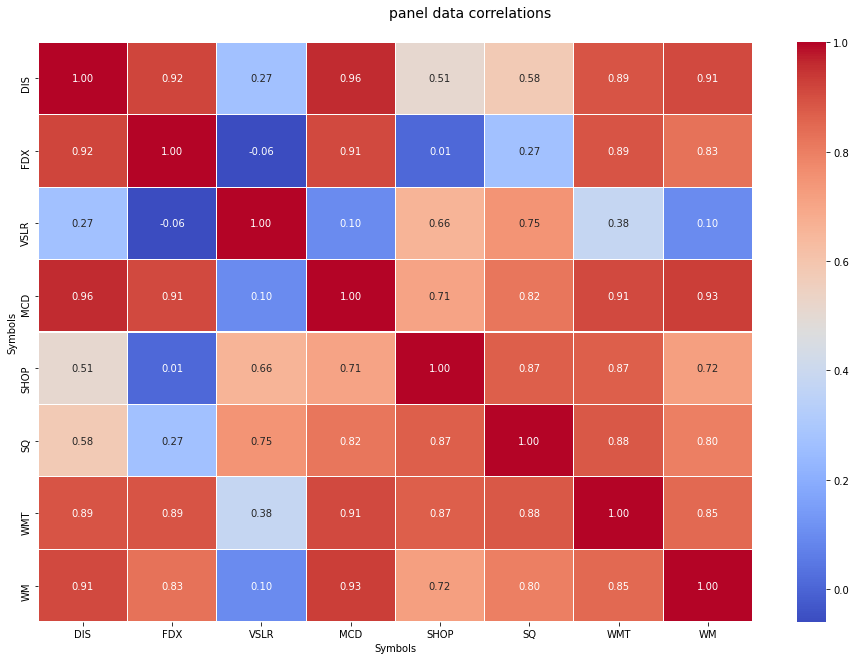

In [ ]:
import seaborn as sn 
f, ax = plt.subplots(figsize=(16, 10))
corr = x['Close'].corr()
hm = sn.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('panel data correlations', fontsize=14)

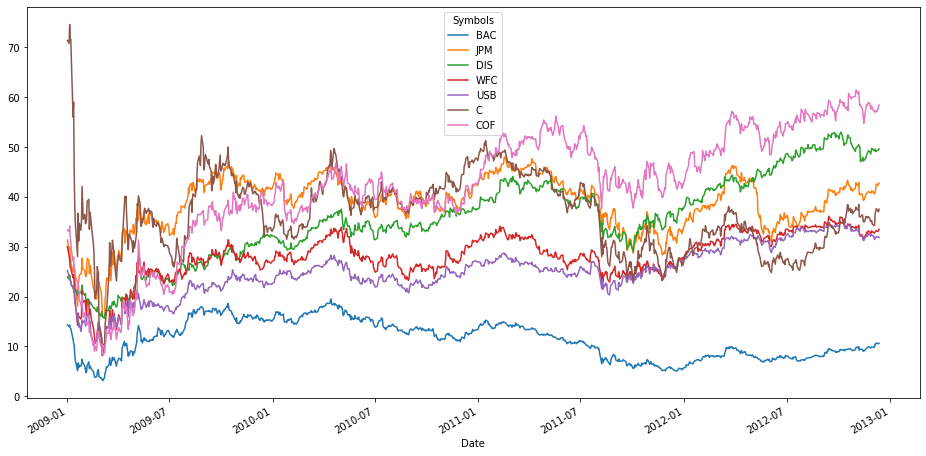

In [ ]:
x1['Close'].plot(figsize=(16,8));

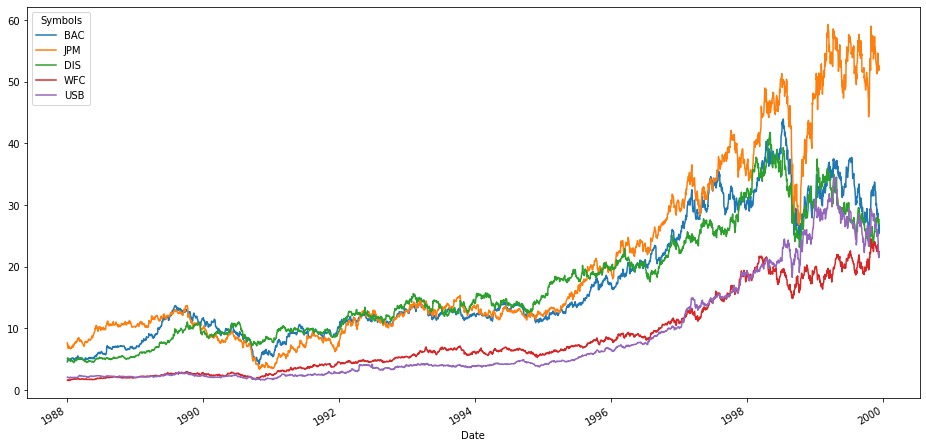

In [ ]:
x2=x.loc['1988-01-01':'1999-12-12',:]
x2['Close'].iloc[:,:-2].plot(figsize=(16,8));
#x2['Close'].plot(figsize=(16,8));

In [ ]:
X2['Soho']=price1['SOHO'].pct_change()
price1['Soho'].dropna()